# 세미 프로잭트
## #01. 작업준비
### 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys


In [3]:
df = pd.read_excel("마지막데이터.xlsx")
df

,Unnamed: 0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,dr_worry,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,y_train
0,0,2,3,1,2,2,2,3,1,1,...,NaN,2,4,0,4,NaN,1,NaN,20,1
1,1,3,3,3,3,3,3,3,1,3,...,NaN,0,5,0,1,942.0,1,172.0,29,1
2,2,1,4,1,1,2,1,4,1,1,...,NaN,0,2,0,1,762.0,1,100.0,18,0
3,3,1,4,1,2,2,2,4,1,1,...,NaN,0,2,0,1,855.0,1,268.0,20,1
4,4,1,4,1,3,1,1,4,1,1,...,NaN,2,2,0,1,399.0,1,140.0,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13469,16582,1,4,1,1,1,1,1,4,1,...,1.0,0,2,0,2,151.0,3,NaN,17,0
13470,16583,1,4,1,1,1,1,1,4,1,...,1.0,2,2,0,4,NaN,3,NaN,17,0
13471,16586,1,4,1,1,1,1,4,1,1,...,NaN,0,2,0,1,222.0,2,833.0,17,0
13472,16589,1,4,1,2,1,1,4,1,1,...,NaN,0,2,0,2,248.0,3,NaN,18,0


In [4]:
test=df.copy()
test['health_state'].unique()

array([4, 5, 2, 3, 1], dtype=int64)

### 데이터 정제

#### y값만 냄겨두기 

In [5]:
df = df.iloc[:,12:-1]
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total
0,2,1945,1,4,NaN,2,NaN,5,NaN,NaN,NaN,2,4,0,4,NaN,1,NaN,20
1,1,1948,2,3,NaN,2,NaN,5,NaN,NaN,NaN,0,5,0,1,942.0,1,172.0,29
2,1,1942,1,7,NaN,2,NaN,5,NaN,NaN,NaN,0,2,0,1,762.0,1,100.0,18
3,1,1962,1,6,NaN,2,NaN,5,NaN,NaN,NaN,0,2,0,1,855.0,1,268.0,20
4,2,1963,1,5,NaN,2,NaN,5,NaN,NaN,NaN,2,2,0,1,399.0,1,140.0,21


#### 데이터 라밸링

In [6]:
df['y_train']=np.where(df['y_total'] > 22,1,0)
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,y_train
0,2,1945,1,4,NaN,2,NaN,5,NaN,NaN,NaN,2,4,0,4,NaN,1,NaN,20,0
1,1,1948,2,3,NaN,2,NaN,5,NaN,NaN,NaN,0,5,0,1,942.0,1,172.0,29,1
2,1,1942,1,7,NaN,2,NaN,5,NaN,NaN,NaN,0,2,0,1,762.0,1,100.0,18,0
3,1,1962,1,6,NaN,2,NaN,5,NaN,NaN,NaN,0,2,0,1,855.0,1,268.0,20,0
4,2,1963,1,5,NaN,2,NaN,5,NaN,NaN,NaN,2,2,0,1,399.0,1,140.0,21,0


In [7]:
df.loc[df['gen']==1 ,'gen'] = 'male'
df.loc[df['gen']==2 ,'gen'] = 'female'


In [8]:
df['gen'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['age']=2023-df['age']
df['age'].head()

0    78
1    75
2    81
3    61
4    60
Name: age, dtype: int64

In [10]:
df.loc[df['religion']==1,'religion'] = 'yes'
df.loc[df['religion']==2,'religion'] = 'no'
df['religion'].unique()

array(['yes', 'no'], dtype=object)

In [11]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train'],
      dtype='object')

In [12]:
df.loc[df['edu']<=3,'edu']="초졸이하"
df.loc[df['edu']==4,'edu']="중졸"
df.loc[df['edu']==5,'edu']="고졸"
df.loc[df['edu']==6,'edu']="대졸이상"
df.loc[df['edu']==7,'edu']="대졸이상"
df.loc[df['edu']==8,'edu']="대졸이상"
df.loc[df['edu']==9,'edu']="대졸이상"


In [13]:
df['edu'].unique()

array(['중졸', '초졸이하', '대졸이상', '고졸'], dtype=object)

In [14]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train'],
      dtype='object')

In [15]:
df.loc[df['sm_state']==1 ,"sm_state"] = 'yes'
df.loc[df['sm_state']==2 ,"sm_state"] = 'no'
df['sm_state'].unique()

array(['no', 'yes'], dtype=object)

In [16]:
df.loc[df['dr_mean_year']==1 ,"dr_mean_year"] = '월1회'
df.loc[df['dr_mean_year']==2 ,"dr_mean_year"] = '월2~3회'
df.loc[df['dr_mean_year']==3 ,"dr_mean_year"] = '주2~3회'
df.loc[df['dr_mean_year']==4 ,"dr_mean_year"] = '주4회이상'
df.loc[df['dr_mean_year']==5 ,"dr_mean_year"] = '전혀마시지않음'
df['dr_6cup'].unique()

array([nan,  3.,  2.,  1.,  5.,  4.])

In [17]:
df.loc[df['dr_6cup']==1 ,"dr_6cup"] = '전혀'
df.loc[df['dr_6cup']==2 ,"dr_6cup"] = '연1회'
df.loc[df['dr_6cup']==3 ,"dr_6cup"] = '월1회'
df.loc[df['dr_6cup']==4 ,"dr_6cup"] = '주1회'
df.loc[df['dr_6cup']==5 ,"dr_6cup"] = '매일'
df['dr_6cup'].unique()

array([nan, '월1회', '연1회', '전혀', '매일', '주1회'], dtype=object)

In [18]:
df.loc[df['dr_hurt']==1 ,"dr_hurt"] = '전혀'
df.loc[df['dr_hurt']==2 ,"dr_hurt"] = '과거존재'
df.loc[df['dr_hurt']==3 ,"dr_hurt"] = '최근존재'
df['dr_hurt'].unique()

array([nan, '전혀', '과거존재', '최근존재'], dtype=object)

In [19]:
df.loc[df['dr_worry']==1 ,"dr_worry"] = '전혀'
df.loc[df['dr_worry']==2 ,"dr_worry"] = '과거존재'
df.loc[df['dr_worry']==3 ,"dr_worry"] = '최근존재'
df['dr_worry'].unique()

array([nan, '전혀', '과거존재', '최근존재'], dtype=object)

In [20]:
df.loc[df['preg_experience']==1 ,"preg_experience"] = '있다'
df.loc[df['preg_experience']==2 ,"preg_experience"] = '없다'
df.loc[df['preg_experience']==0 ,"preg_experience"] = '남성'

df['preg_experience'].unique()

array(['없다', '남성', '있다'], dtype=object)

In [21]:
df.loc[df['health_state']==1 ,"health_state"] = '5'
df.loc[df['health_state']==2 ,"health_state"] = '4'
df.loc[df['health_state']==3 ,"health_state"] = '3'
df.loc[df['health_state']==4 ,"health_state"] = '2'
df.loc[df['health_state']==5 ,"health_state"] = '1'
df['health_state']= df['health_state'].astype(int)
df['health_state'].unique()

array([2, 1, 4, 3, 5])

In [22]:
df['disabled'].unique()

array([ 0,  1,  4, 16, 15,  8,  3,  2, 14,  9,  6, 11, 12, 10, 13,  5],
      dtype=int64)

In [23]:
df['disabled'] = df['disabled'].apply(lambda x: 'abled' if x==0 else 'disabled')
df['disabled'].unique()

array(['abled', 'disabled'], dtype=object)

In [24]:
df.loc[df['work_state']==1 ,"work_state"] = 'work'
df.loc[df['work_state']==2 ,"work_state"] = 'work'
df.loc[df['work_state']==3 ,"work_state"] = 'work'
df.loc[df['work_state']==4 ,"work_state"] = 'nowork'
df.loc[df['work_state']==5 ,"work_state"] = 'nowork'
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

In [25]:
df.loc[df['region']==1 ,"region"] = 'city'
df.loc[df['region']==2 ,"region"] = 'city'
df.loc[df['region']==3 ,"region"] = 'city'
df.loc[df['region']==4 ,"region"] = 'country'
df.loc[df['region']==5 ,"region"] = 'country'
df['region'].unique()

array(['city', 'country'], dtype=object)

In [26]:
df.head()

,gen,age,religion,edu,sm_year,sm_state,sm_day,dr_mean_year,dr_6cup,dr_hurt,dr_worry,preg_experience,health_state,disabled,work_state,work_code,region,income,y_total,y_train
0,female,78,yes,중졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,없다,2,abled,nowork,NaN,city,NaN,20,0
1,male,75,no,초졸이하,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,남성,1,abled,work,942.0,city,172.0,29,1
2,male,81,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,남성,4,abled,work,762.0,city,100.0,18,0
3,male,61,yes,대졸이상,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,남성,4,abled,work,855.0,city,268.0,20,0
4,female,60,yes,고졸,NaN,no,NaN,전혀마시지않음,NaN,NaN,NaN,없다,4,abled,work,399.0,city,140.0,21,0


In [27]:
df['gen'].isnull().sum()

0

In [28]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

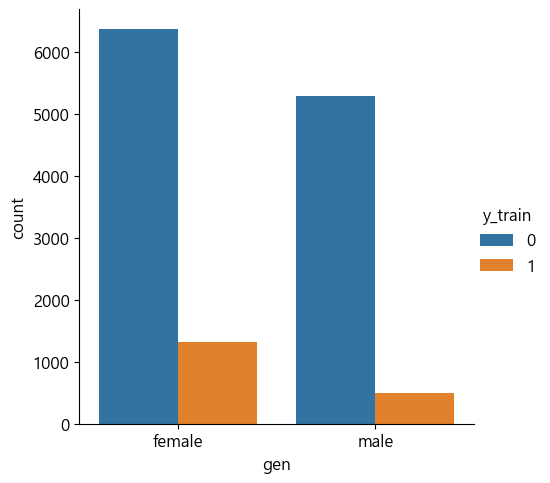

In [29]:
sns.catplot(data=df,x='gen',kind='count',hue='y_train')

In [30]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train'],
      dtype='object')

<Axes: xlabel='age', ylabel='y_total'>

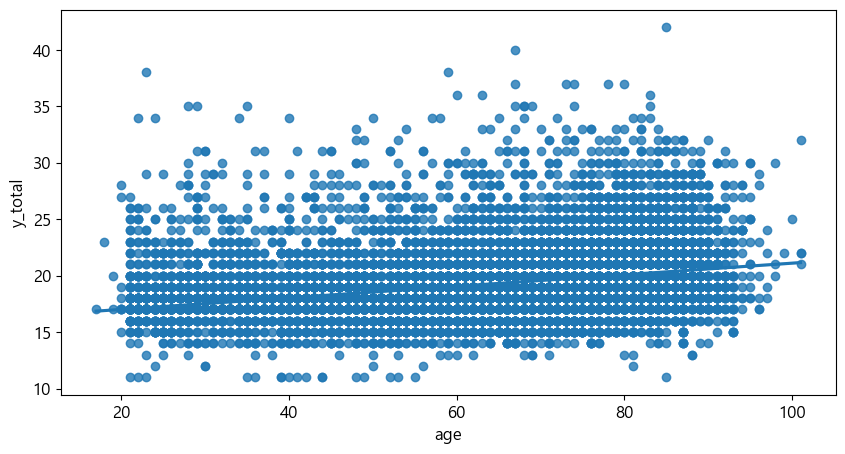

In [31]:
sns.regplot(data=df,x='age',y='y_total')

In [32]:
corr = df[['age','y_total']].corr(method='pearson')
corr

,age,y_total
age,1.000000,0.301144
y_total,0.301144,1.000000


In [33]:
bins = [20,29,39,49,59,99]
labels = ['19~29세','30~39세','40~49세','50~59세','60세 이상']

cuts = pd.cut(df['age'],bins,labels=labels)
df['age_range'] = cuts


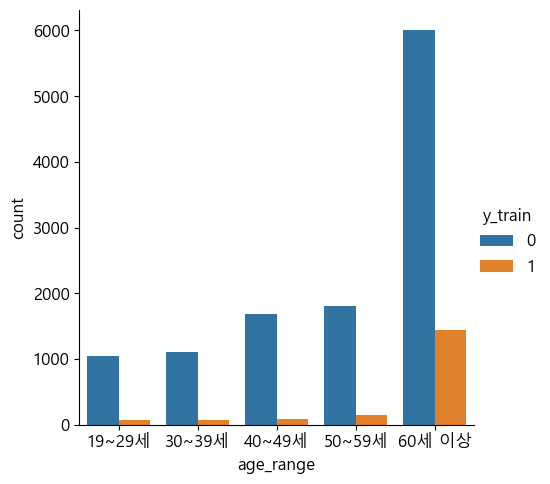

In [34]:
sns.catplot(data=df,x='age_range',kind='count',hue='y_train')

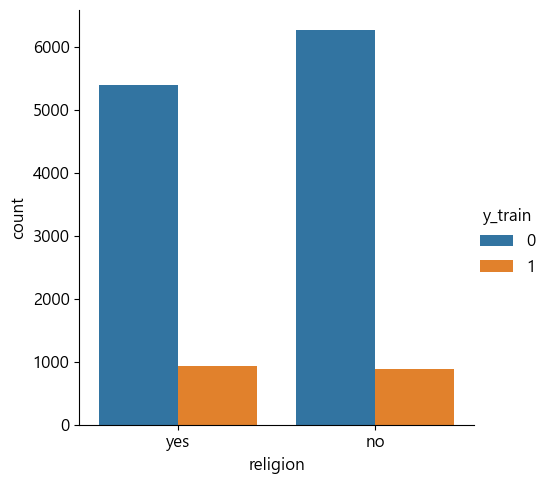

In [35]:
sns.catplot(data=df,x='religion',kind='count',hue='y_train')

In [36]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

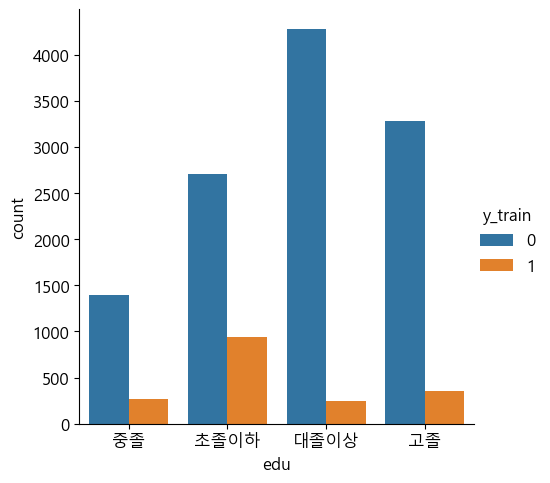

In [37]:
sns.catplot(data=df,x='edu',kind='count',hue='y_train')

In [38]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

In [39]:
df['sm_state'].isnull().sum()

0

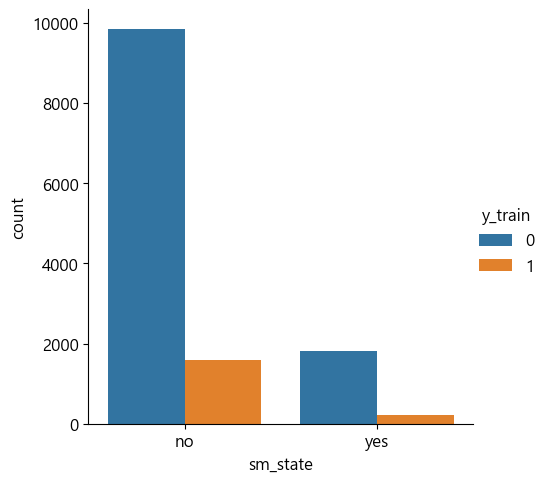

In [40]:
sns.catplot(data=df,x='sm_state',kind='count',hue='y_train')

In [41]:
df['sm_state'].value_counts()

sm_state
no     11438
yes     2036
Name: count, dtype: int64

In [42]:
from sklearn.utils import resample

subset_city_downsampled = resample(df[df['sm_state']=='no'],
                            replace=False,
                            n_samples =2036 ,
                            random_state = 2020)
                            


In [43]:
sm_data = pd.concat([df[df['sm_state']=='yes'],subset_city_downsampled])
sm_data['sm_state'].value_counts()


sm_state
yes    2036
no     2036
Name: count, dtype: int64

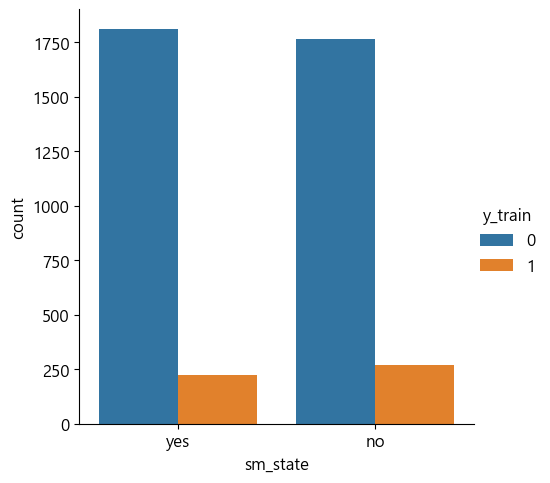

In [44]:
sns.catplot(data=sm_data,x='sm_state',kind='count',hue='y_train')

In [45]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

,sm_year,y_total
sm_year,1.000000,0.109959
y_total,0.109959,1.000000


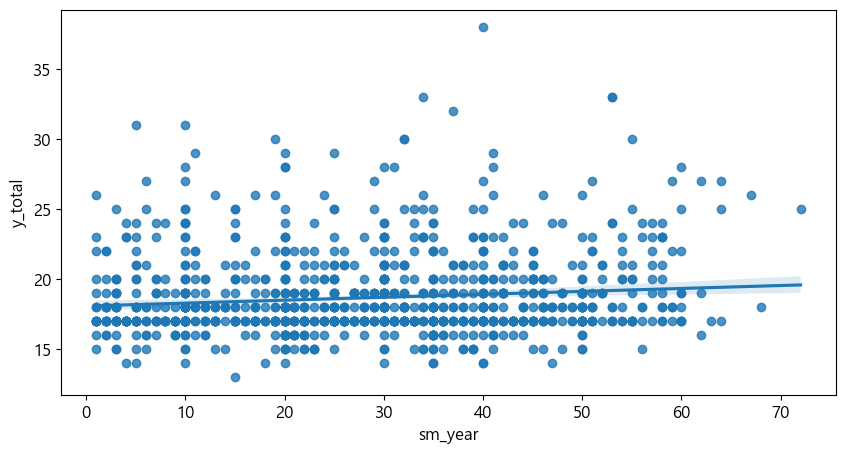

In [46]:
smoking = df.loc[df['sm_year']>0,]

sns.regplot(data=smoking,x='sm_year',y='y_total')
corr = smoking[['sm_year','y_total']].corr(method='pearson')
corr


In [47]:
corr = smoking[['sm_year','y_total']].corr(method='pearson')
corr

,sm_year,y_total
sm_year,1.000000,0.109959
y_total,0.109959,1.000000


In [48]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

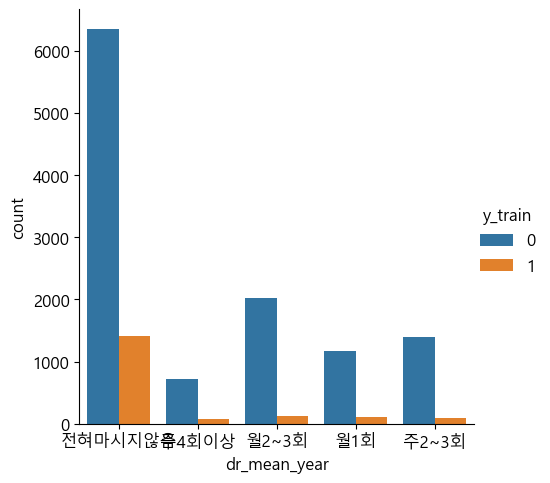

In [49]:
sns.catplot(data=df,x='dr_mean_year',kind='count',hue='y_train')

In [50]:
df['dr_6cup'].unique()

array([nan, '월1회', '연1회', '전혀', '매일', '주1회'], dtype=object)

In [51]:
over_dr = df.loc[df['dr_6cup'].notnull(),:]

over_dr['dr_6cup'].isnull().sum()

0

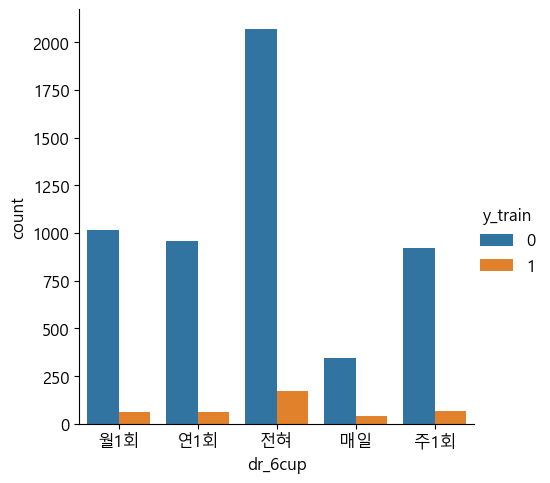

In [52]:
sns.catplot(data=over_dr,x='dr_6cup',kind='count',hue='y_train')

In [53]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

In [54]:
df['dr_hurt'].unique()

array([nan, '전혀', '과거존재', '최근존재'], dtype=object)

# 다치게한경험 칼럼이랑 걱정시키게한경험 칼럼 없애기 

In [55]:
hurt = df.loc[df['dr_hurt'].notnull(),:]
hurt = hurt.loc[hurt['dr_hurt']!='전혀',:]

In [56]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

In [57]:
df['preg_experience'].unique()

array(['없다', '남성', '있다'], dtype=object)

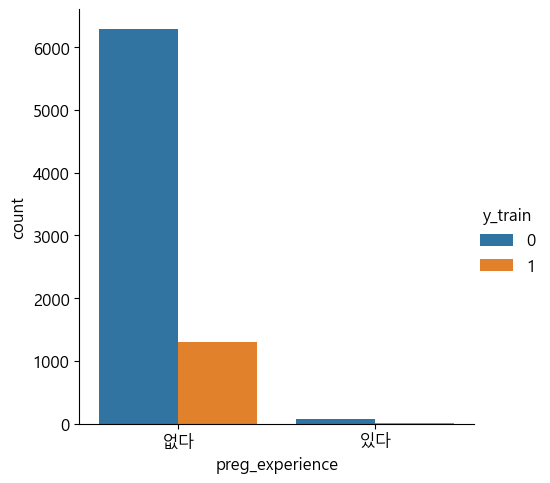

In [58]:
woman = df.loc[df['preg_experience']!='남성']
sns.catplot(data=woman,x='preg_experience',kind='count',hue='y_train')

In [59]:
woman['preg_experience'].value_counts()

preg_experience
없다    7596
있다      86
Name: count, dtype: int64

In [60]:
subset_city_downsampled = resample(woman[woman['preg_experience']=='없다'],
                            replace=False,
                            n_samples =100 ,
                            random_state = 2020)


In [61]:
sm_data = pd.concat([woman[woman['preg_experience']=='있다'],subset_city_downsampled])
sm_data['preg_experience'].value_counts()

preg_experience
없다    100
있다     86
Name: count, dtype: int64

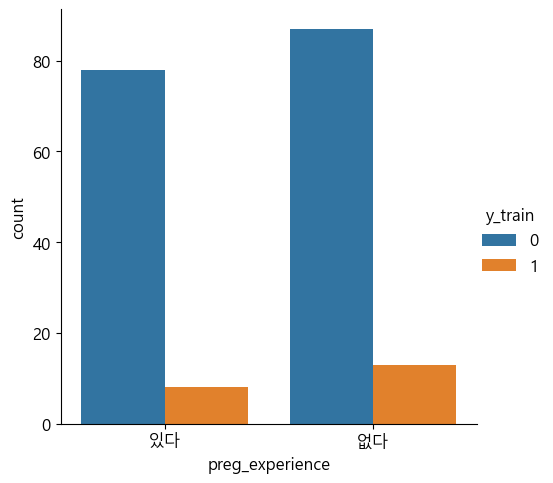

In [62]:
sns.catplot(data=sm_data,x='preg_experience',kind='count',hue='y_train')

In [63]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

In [64]:
df['health_state'].unique()

array([2, 1, 4, 3, 5])

,health_state,y_total
health_state,1.00000,-0.39022
y_total,-0.39022,1.00000


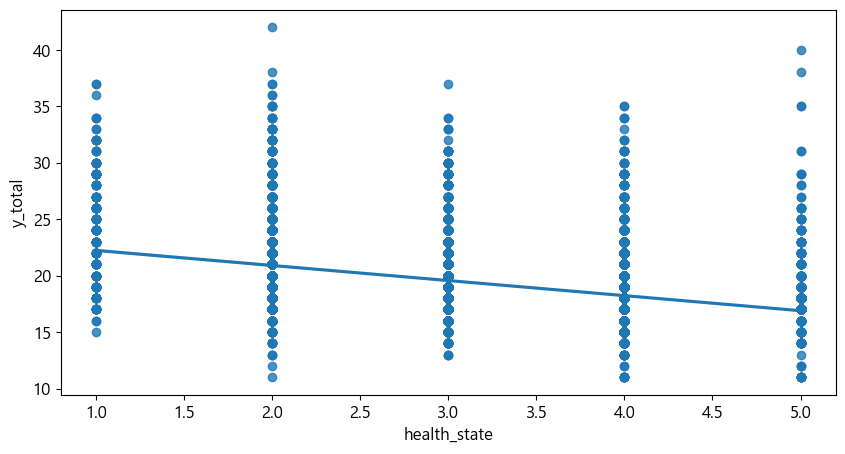

In [65]:

sns.regplot(data=df,x='health_state',y='y_total')
corr = df[['health_state','y_total']].corr(method='pearson')
corr

In [66]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

In [67]:
df['disabled'].value_counts()

disabled
abled       12187
disabled     1287
Name: count, dtype: int64

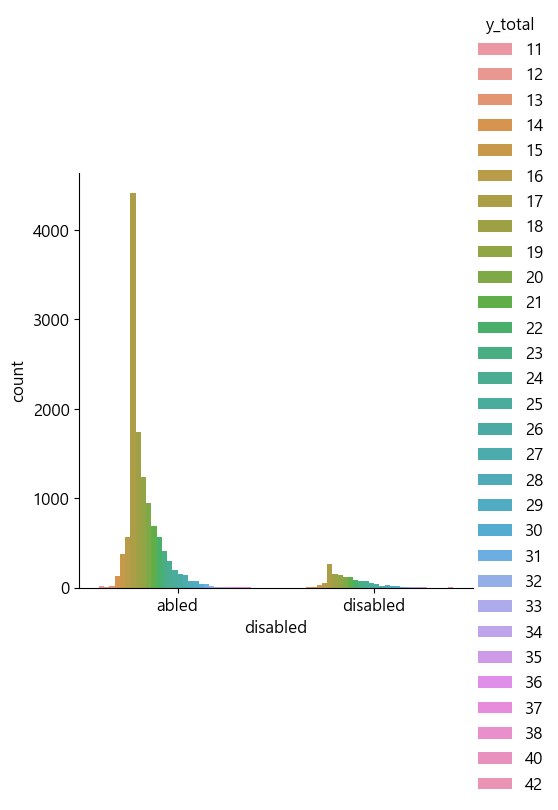

In [68]:
sns.catplot(data=df,x='disabled',kind='count',hue='y_total')

In [69]:
subset_city_downsampled = resample(df[df['disabled']=='abled'],
                            replace=False,
                            n_samples =1287 ,
                            random_state = 2020)
able = pd.concat([df[df['disabled']=='disabled'],subset_city_downsampled])
able['disabled'].value_counts()

disabled
disabled    1287
abled       1287
Name: count, dtype: int64

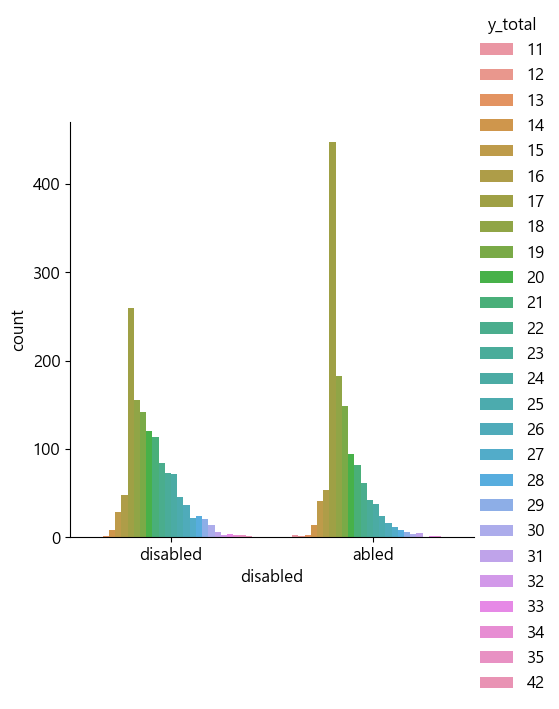

In [70]:
sns.catplot(data=able,x='disabled',kind='count',hue='y_total')

In [71]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

In [72]:
df['work_state'].unique()

array(['nowork', 'work'], dtype=object)

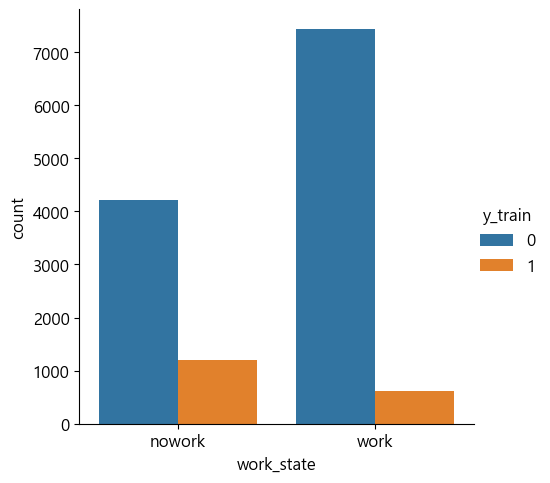

In [73]:
sns.catplot(data=df,x='work_state',kind='count',hue='y_train')

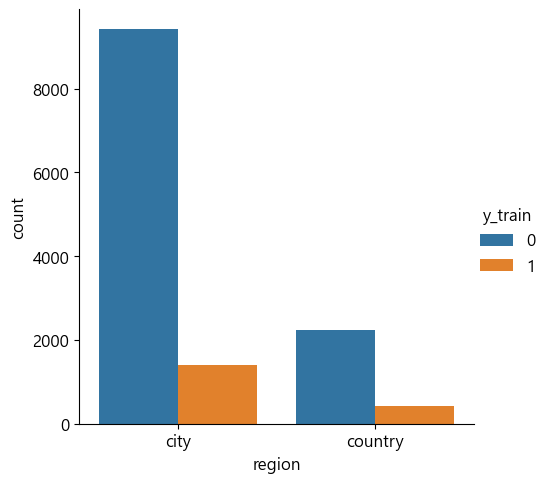

In [74]:
sns.catplot(data=df,x='region',kind='count',hue='y_train')

In [75]:
df['region'].value_counts()

region
city       10826
country     2648
Name: count, dtype: int64

In [76]:

subset_city_downsampled = resample(df[df['region']=='city'],
                            replace=False,
                            n_samples =2648 ,
                            random_state = 2020)
city = pd.concat([df[df['region']=='country'],subset_city_downsampled])
city['region'].value_counts()

region
country    2648
city       2648
Name: count, dtype: int64

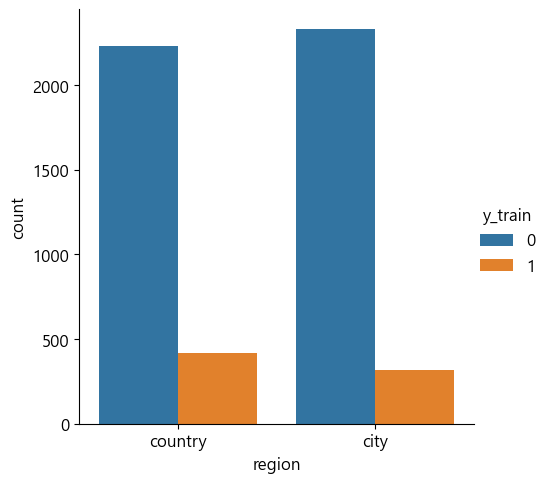

In [77]:
sns.catplot(data=city,x='region',kind='count',hue='y_train')

In [78]:
df.columns

Index(['gen', 'age', 'religion', 'edu', 'sm_year', 'sm_state', 'sm_day',
       'dr_mean_year', 'dr_6cup', 'dr_hurt', 'dr_worry', 'preg_experience',
       'health_state', 'disabled', 'work_state', 'work_code', 'region',
       'income', 'y_total', 'y_train', 'age_range'],
      dtype='object')

,income,y_total
income,1.000000,-0.212786
y_total,-0.212786,1.000000


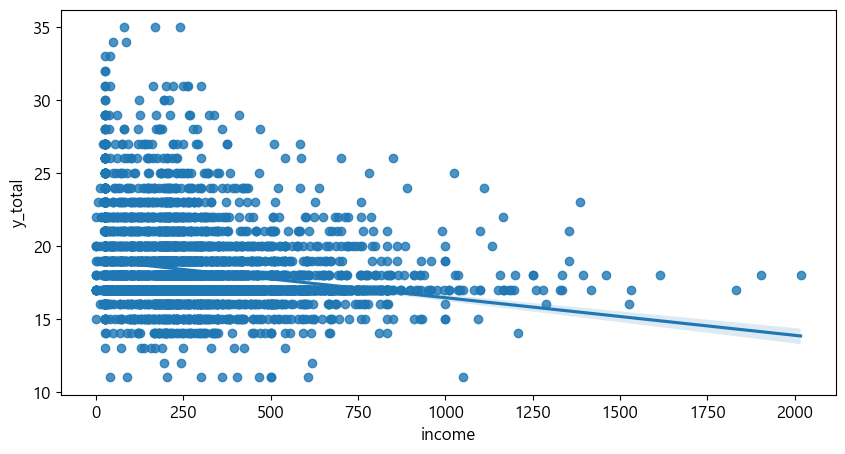

In [79]:

sns.regplot(data=df,x='income',y='y_total')
corr = df[['income','y_total']].corr(method='pearson')
corr